# Bike Store Sales Data Analysis
Data directory: .\data_samples\bikes_sales_data.csv

# Get Data File and Setup

In [2]:
data_directory = ".\\data_samples\\bikes_sales_data.csv"
print(data_directory)
min_year = 2013
max_year = 2025

.\data_samples\bikes_sales_data.csv


# STEP 1: Data Gathering
#### (Get the data as source)

In [3]:
import pandas

data_source = pandas.read_csv(data_directory, parse_dates=["Date"])
data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

(+) Printing Data

In [4]:
data_source.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401


# STEP 2: Data Cleaning
### (Removes all unnecessary key)
Get Only:
- Year
- Product
- Profit (sum of the specific year and product)

In [5]:
import matplotlib.pyplot as plt
cleaned_data_source = data_source[["Year", "Product", "Profit"]].loc[data_source["Year"] >= 2013]
cleaned_data_source_processed = cleaned_data_source.groupby(["Year", "Product"]).agg({"Profit": "sum"})
cleaned_data_source_processed

Profit
Year Product                           
2013 AWC Logo Cap                 16712
     All-Purpose Bike Stand       55456
     Bike Wash - Dissolver        25121
     Classic Vest, L              33778
     Classic Vest, M              41782
...                                 ...
2016 Touring-3000 Yellow, 62       4914
     Water Bottle - 30 oz.       119141
     Women's Mountain Shorts, L   75159
     Women's Mountain Shorts, M   86370
     Women's Mountain Shorts, S   90778

[520 rows x 1 columns]

# STEP 3: Data Wrangling
### (Change how data looks as needed)

(+) Get the grouped data by product and sum of all profit of the product and sort it by profit descending

This is used for below code

In [6]:
# data_source.groupby("Product")["Profit"].sum().sort_values().plot.bar(x="Product", y="Profit", width=0.5, figsize=(30, 5))
year_limited_data_source = data_source.loc[(lambda df: (df['Year'] >= min_year) & (df['Year'] <= max_year))]
grouped_data_source = year_limited_data_source.groupby("Product").agg({"Profit": "sum", "Order_Quantity": "sum", "Customer_Age": "median"}).sort_values("Profit", ascending=False)
grouped_data_source

,Profit,Order_Quantity,Customer_Age
Product,,,
"Sport-100 Helmet, Red",1191402,63663,35.0
"Sport-100 Helmet, Black",1141330,62105,35.0
"Sport-100 Helmet, Blue",1048446,55895,36.0
"Mountain-200 Black, 38",1034996,1289,33.0
"Mountain-200 Silver, 42",977687,1150,35.0
...,...,...,...
"Mountain-500 Silver, 52",14948,77,32.0
"Touring-3000 Blue, 50",13424,70,33.0
"Mountain-500 Silver, 48",8176,43,38.0


(+) Specify What Products You Want To Analyze

I want to specify three highest profit product

In [25]:
products_name = grouped_data_source.index.tolist()[3:6]
products_name

['Mountain-200 Black, 38',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 38']

# STEP 4: Data Analyzing
### (Analyze and Visualize data so that we can get some insights from it)

(+) Create a subplots from data that we want to see (which is the selected product data)

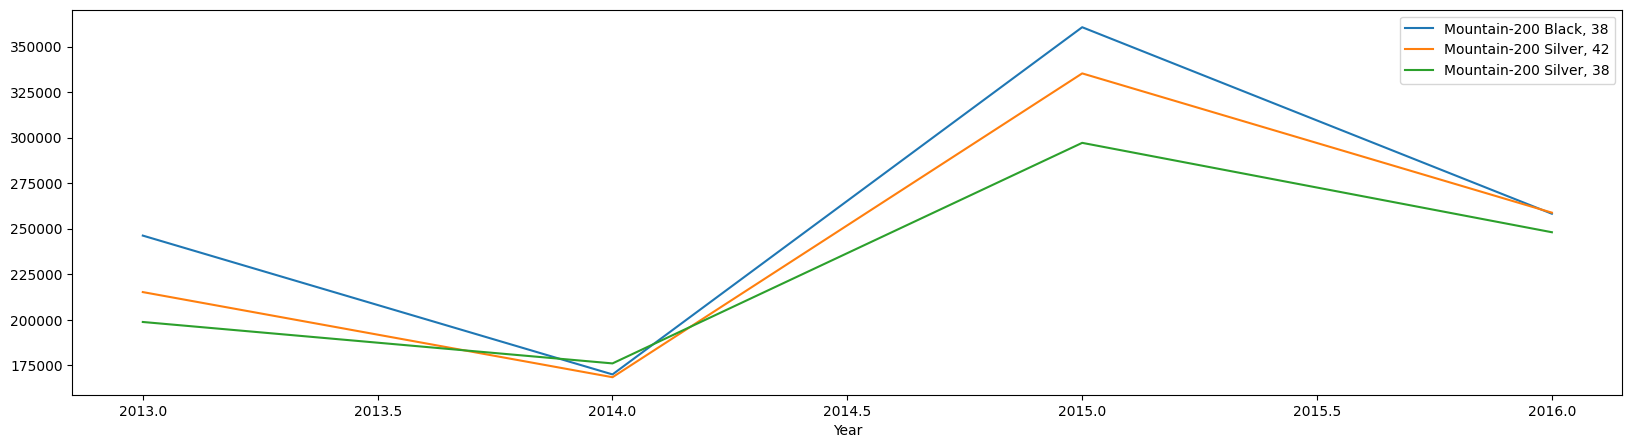

In [26]:
fig, ax = plt.subplots()
for product_name in products_name:
    new_data_source = cleaned_data_source.loc[data_source["Product"] == product_name].groupby("Year")["Profit"].sum()
    new_data_source.plot(kind="line", x="Year", y="Profit", ax=ax, figsize=(20, 5))
ax.legend(products_name)

# STEP 5: Storytelling
### (Gives a brief explanation about what insight that we got and plan for the future)

In [27]:
for product_name in products_name:
    profits = [int(i) for i in list(cleaned_data_source.loc[data_source["Product"] == product_name].groupby("Year")["Profit"].sum().values)]
    if profits[-1] > profits[-2]:
        print(f"{product_name} will go high next year fr!")
    else:
        print(f"{product_name} will go low, don't invest!")

Mountain-200 Black, 38 will go low, don't invest!
Mountain-200 Silver, 42 will go low, don't invest!
Mountain-200 Silver, 38 will go low, don't invest!
